# Report on Food Insecurity and Nutritional Assistance in the United States

### Introduction:
The Food Environment Atlas provides a comprehensive view of various factors influencing food choices and diet quality across different states in the United States. This report analyzes the correlations between poverty levels, food insecurity, malnutrition, and the effectiveness of nutritional assistance programs such as the Special Supplemental Nutrition Program for Women, Infants, and Children (WIC). Additionally, it explores the long-term implications of childhood food insecurity on individuals as they mature into adults.

(https://www.ers.usda.gov/data-products/food-environment-atlas/data-access-and-documentation-downloads/#Current%20Version)

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [186]:

url_Insecurity = "https://raw.githubusercontent.com/Benson90/Data-608/main/FoodEnvironmentAtlas-Insecurity.csv"
url_Access = "https://raw.githubusercontent.com/Benson90/Data-608/main/FoodEnvironmentAtlas-access.csv"
url_Assistance = "https://raw.githubusercontent.com/Benson90/Data-608/main/FoodEnvironmentAtlas-assistance.csv"
url_Socioeconomic = "https://raw.githubusercontent.com/Benson90/Data-608/main/FoodEnvironmentAtlas-Socioeconomic.csv"

df_Insecurity = pd.read_csv(url_Insecurity)
df_Access = pd.read_csv(url_Access)
df_Assistance = pd.read_csv(url_Assistance)
df_Socioeconomic = pd.read_csv(url_Socioeconomic)

#print(df_Insecurity.columns)
#print(df_Access.columns)
#print(df_Assistance.columns)
#print(df_Socioeconomic.columns)

In [187]:
df_combined = df_Insecurity.merge(df_Access, on="FIPS", suffixes=('_Insecurity', '_Access')).merge(df_Assistance, on="FIPS", suffixes=('', '_Assistance')).merge(df_Socioeconomic, on="FIPS", suffixes=('', '_Socioeconomic'))

#print(df_combined.columns)

### Food Insecurity Rates (2015-2017):

- States with the highest rates of food insecurity during this period were New York (NY), Missouri (MO), Louisiana (LA), Arizona (AZ), and Alabama (AL). Notably, New York experienced a significant increase in food insecurity, with a rise of up to 5%.

- Pennsylvania (PA), New York (NY), Nevada (NV), and Maine (ME) were the only states that saw an increase in food insecurity rates from 2014-2017.

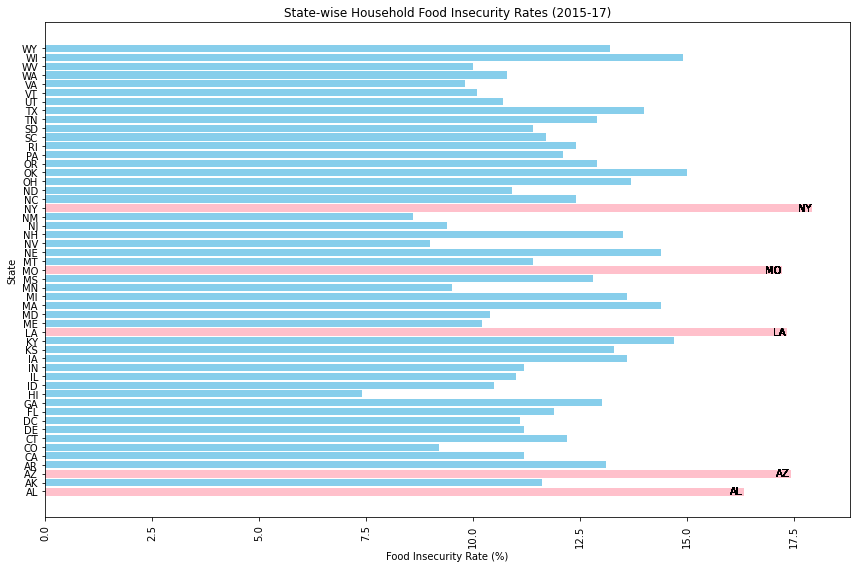

In [188]:
plt.figure(figsize=(12, 8))
bars = plt.barh(df_combined['State_Insecurity'], df_combined['FOODINSEC_15_17'], color='skyblue')

plt.xlabel('Food Insecurity Rate (%)')
plt.ylabel('State')
plt.title('State-wise Household Food Insecurity Rates (2015-17)')

plt.xticks(rotation=90)

for i in range(len(df_combined)):
    if df_combined['FOODINSEC_15_17'][i] > 15:
        bars[i].set_color('pink')

for bar, state,value in zip(bars, df_combined['State_Insecurity'], df_combined['FOODINSEC_15_17']):
    if value > 15:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, state, va='center', ha='right', color='black')

plt.tight_layout() 
plt.show()

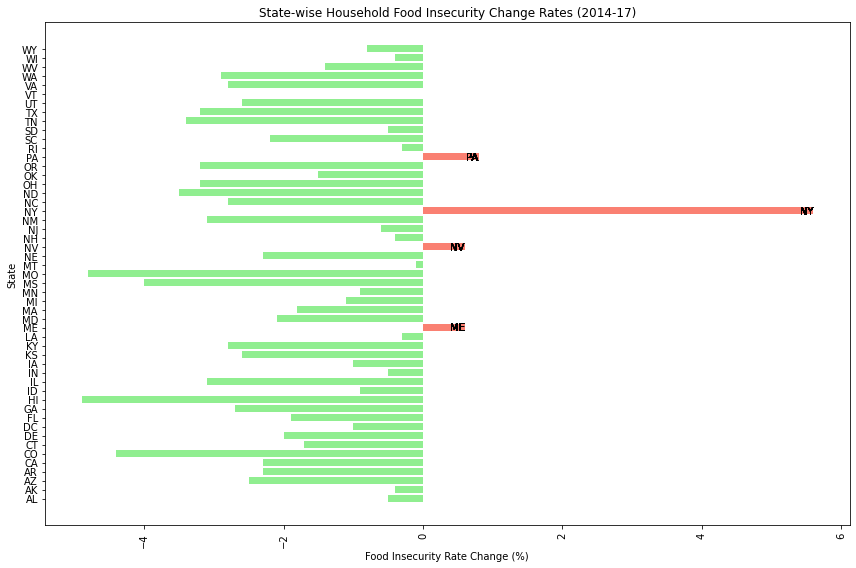

In [189]:
plt.figure(figsize=(12, 8))
bars = plt.barh(df_combined['State_Insecurity'], df_combined['CH_FOODINSEC_14_17'], color=['salmon' if x > 0 else 'Lightgreen' for x in df_combined['CH_FOODINSEC_14_17']])

plt.xlabel('Food Insecurity Rate Change (%)')
plt.ylabel('State')
plt.title('State-wise Household Food Insecurity Change Rates (2014-17)')

plt.xticks(rotation=90)

for bar, state,value in zip(bars, df_combined['State_Insecurity'], df_combined['CH_FOODINSEC_14_17']):
    if value > 0:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, state, va='center', ha='right', color='black')

plt.tight_layout() 
plt.show()

### Low Access to Stores for Children and Seniors:

- States such as Texas (TX), South Dakota (SD), Utah (UT), Idaho (ID), Kansas (KS), and Alaska (AK) exhibited the highest percentages of low access to stores for children in 2015, correlating with the rate of change from 2010-2015.

- For seniors, North Dakota (ND), South Dakota (SD), Oregon (OR), New Mexico (NM), Nebraska (NE), and the District of Columbia (DC) had the highest percentages of low access to stores. However, the trend did not directly align with the rate of change from 2010-2015.

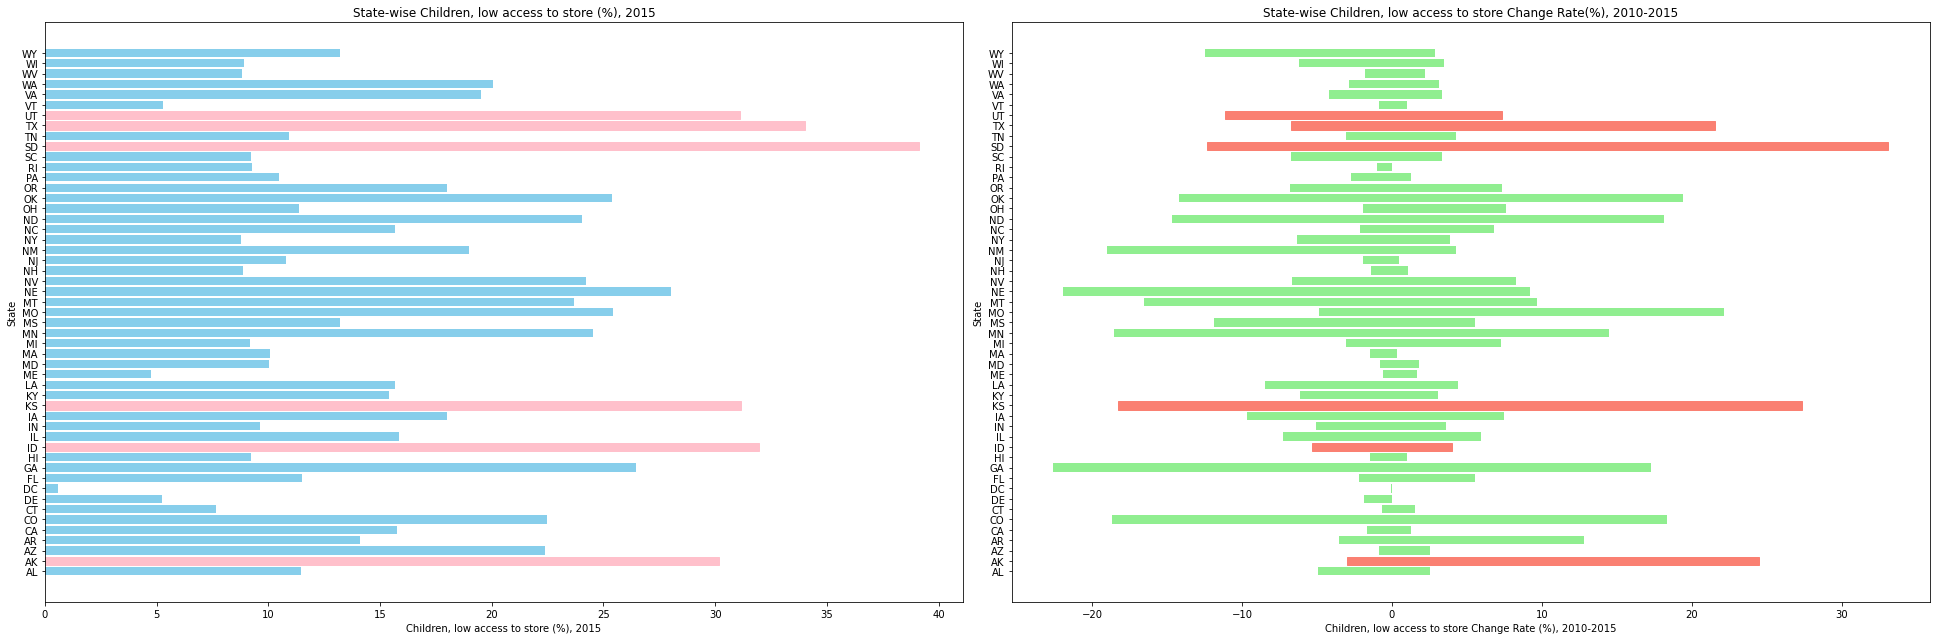

In [190]:
df_combined['PCH_LACCESS_CHILD_10_15'] = df_combined['PCT_LACCESS_CHILD15'] - df_combined['PCT_LACCESS_CHILD10']

fig, axes = plt.subplots(1, 2, figsize=(27, 9))

bars1 = axes[0].barh(df_combined['State'], df_combined['PCT_LACCESS_CHILD15'], color='skyblue')

bars2 = axes[1].barh(df_combined['State'], df_combined['PCH_LACCESS_CHILD_10_15'], color='Lightgreen')

for i, state in enumerate(df_combined['State']):
    if state in ['TX', 'SD', 'UT', 'ID', 'KS','AK']:
        bars1[i].set_color('pink')
        
for i, state in enumerate(df_combined['State']):
    if state in ['TX', 'SD', 'UT', 'ID', 'KS','AK']:
        bars2[i].set_color('salmon')

axes[0].set_xlabel("Children, low access to store (%), 2015")
axes[0].set_ylabel('State')
axes[0].set_title("State-wise Children, low access to store (%), 2015")

axes[1].set_xlabel("Children, low access to store Change Rate (%), 2010-2015")
axes[1].set_ylabel('State')
axes[1].set_title("State-wise Children, low access to store Change Rate(%), 2010-2015")

plt.tight_layout() 
plt.show()

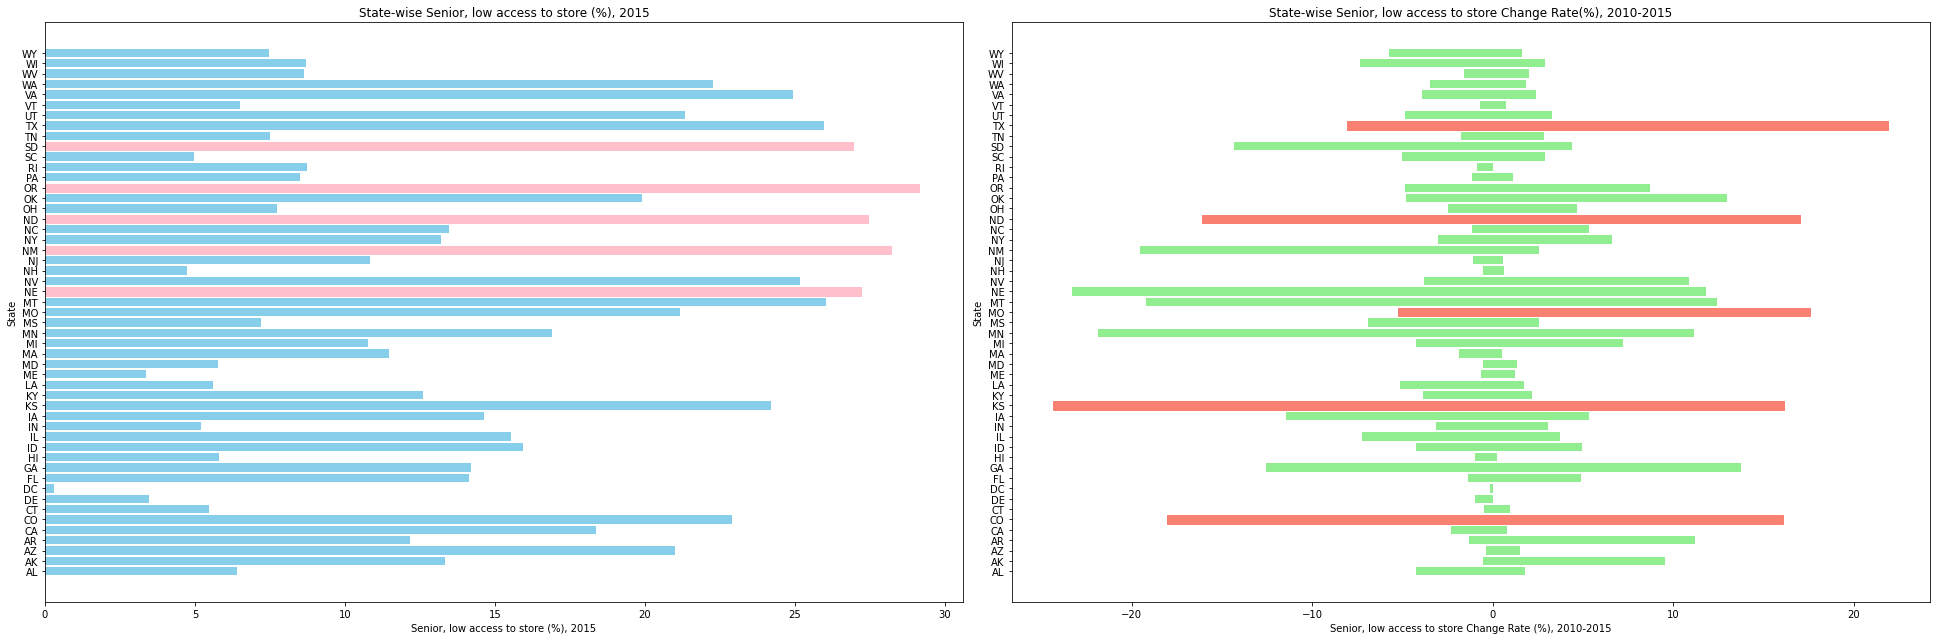

In [191]:
df_combined['PCH_LACCESS_SENIORS_10_15'] = df_combined['PCT_LACCESS_SENIORS15'] - df_combined['PCT_LACCESS_SENIORS10']

fig, axes = plt.subplots(1, 2, figsize=(27, 9))

bars1 = axes[0].barh(df_combined['State'], df_combined['PCT_LACCESS_SENIORS15'], color='skyblue')

bars2 = axes[1].barh(df_combined['State'], df_combined['PCH_LACCESS_SENIORS_10_15'], color='Lightgreen')

for i, state in enumerate(df_combined['State']):
    if state in ['ND', 'SD', 'OR', 'NM', 'NE','CD']:
        bars1[i].set_color('pink')
        
for i, state in enumerate(df_combined['State']):
    if state in ['ND', 'TX', 'KS', 'MO', 'CO','CD']:
        bars2[i].set_color('salmon')

axes[0].set_xlabel("Senior, low access to store (%), 2015")
axes[0].set_ylabel('State')
axes[0].set_title("State-wise Senior, low access to store (%), 2015")

axes[1].set_xlabel("Senior, low access to store Change Rate (%), 2010-2015")
axes[1].set_ylabel('State')
axes[1].set_title("State-wise Senior, low access to store Change Rate(%), 2010-2015")

plt.tight_layout()  
plt.show()

### Participation in WIC Programs:

- The states with the highest participation rates in the WIC program for women were Texas (TX), Oklahoma (OK), Mississippi (MS), Louisiana (LA), and Arkansas (AR). Interestingly, the correlation between high participation and high poverty rates was inconsistent across all states.

- Participation rates in WIC programs showed a decreasing trend over time, indicating a potential improvement in the need for nutritional assistance. However, this assumption requires further analysis with poverty rate trend.

- In terms of WIC participation for infants and children, Vermont (VT), Florida (FL), Mississippi (MS), California (CA), and Alabama (AL) were the top states. Like WIC for women, the correlation with poverty rates varied across states.

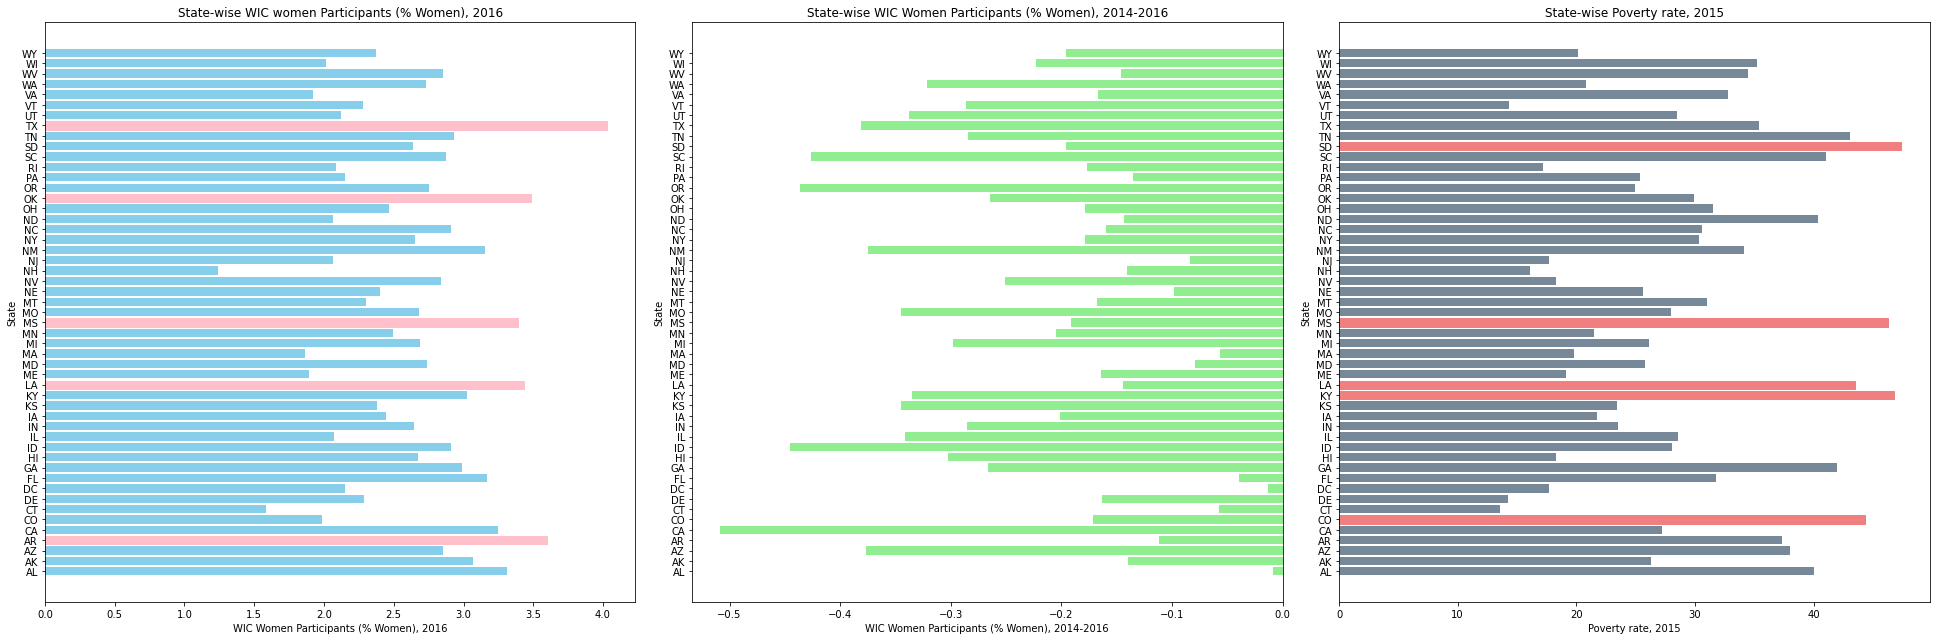

In [192]:
fig, axes = plt.subplots(1, 3, figsize=(27, 9))

bars1 = axes[0].barh(df_combined['State'], df_combined['PCT_WICWOMEN16'], color='skyblue')

bars2 = axes[1].barh(df_combined['State'], df_combined['PCH_WICWOMEN_14_16'], color='Lightgreen')

bars3 = axes[2].barh(df_combined['State'], df_combined['POVRATE15'], color='LightSlateGray')

for i, state in enumerate(df_combined['State']):
    if state in ['TX', 'OK', 'MS', 'LA', 'AR']:
        bars1[i].set_color('pink')
        
for i, state in enumerate(df_combined['State']):
    if state in ['SD', 'KY', 'MS', 'CO', 'LA']:
        bars3[i].set_color('LightCoral')

axes[0].set_xlabel("WIC Women Participants (% Women), 2016")
axes[0].set_ylabel('State')
axes[0].set_title("State-wise WIC women Participants (% Women), 2016")

axes[1].set_xlabel("WIC Women Participants (% Women), 2014-2016")
axes[1].set_ylabel('State')
axes[1].set_title("State-wise WIC Women Participants (% Women), 2014-2016")

axes[2].set_xlabel("Poverty rate, 2015")
axes[2].set_ylabel('State')
axes[2].set_title("State-wise Poverty rate, 2015")

plt.tight_layout()  
plt.show()

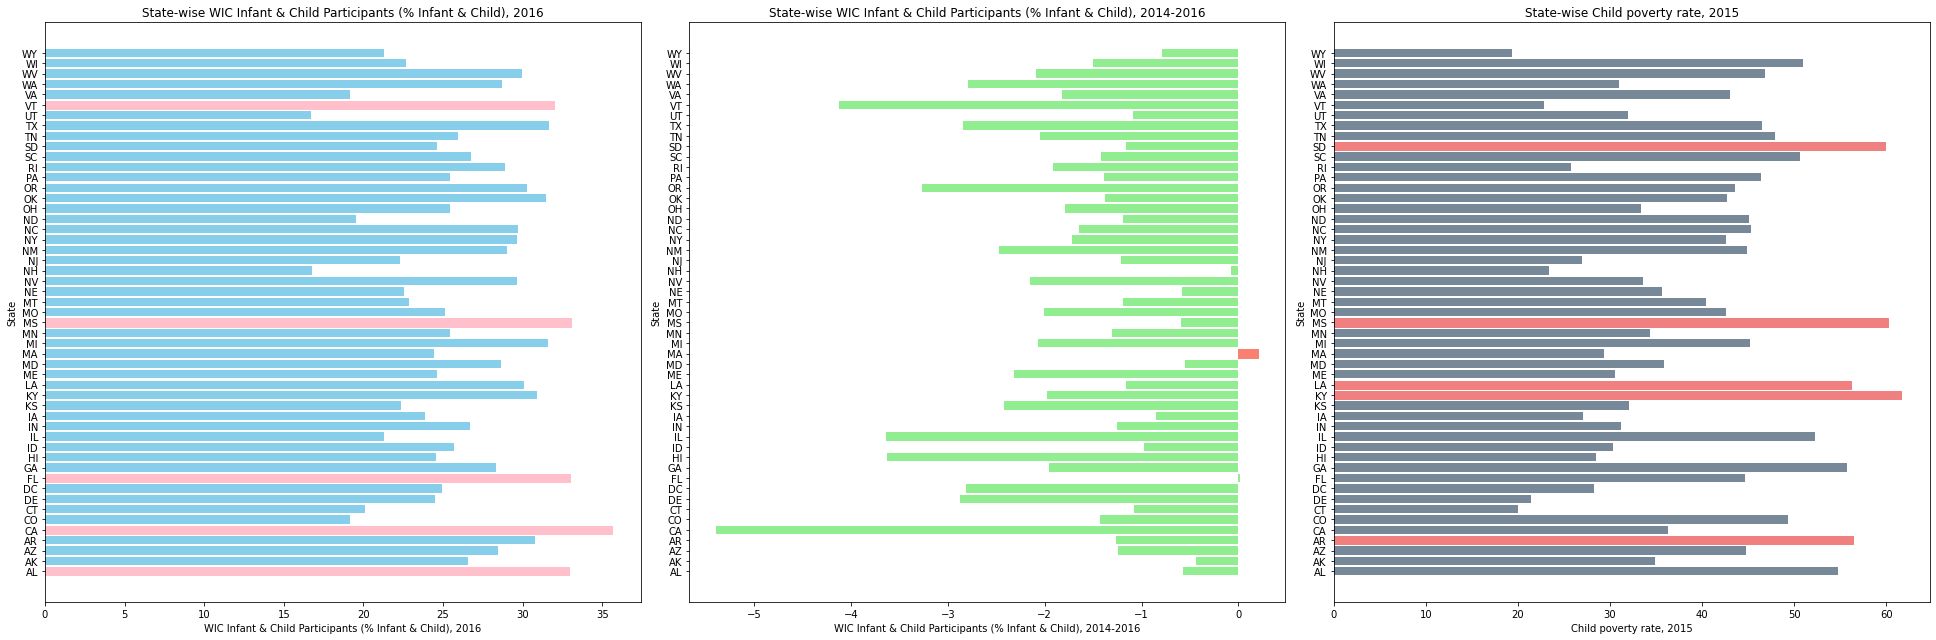

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(27, 9))

bars1 = axes[0].barh(df_combined['State'], df_combined['PCT_WICINFANTCHILD16'], color='skyblue')

bars2 = axes[1].barh(df_combined['State'], df_combined['PCH_WICINFANTCHILD_14_16'], color='Lightgreen')

bars3 = axes[2].barh(df_combined['State'], df_combined['CHILDPOVRATE15'], color='LightSlateGray')

for i, state in enumerate(df_combined['State']):
    if state in ['VT', 'FL', 'MS', 'CA', 'AL']:
        bars1[i].set_color('pink')
        
for i, state in enumerate(df_combined['State']):
    if state in ['MA']:
        bars2[i].set_color('salmon')
        
for i, state in enumerate(df_combined['State']):
    if state in ['SD', 'KY', 'MS', 'AR', 'LA']:
        bars3[i].set_color('LightCoral')

axes[0].set_xlabel("WIC Infant & Child Participants (% Infant & Child), 2016")
axes[0].set_ylabel('State')
axes[0].set_title("State-wise WIC Infant & Child Participants (% Infant & Child), 2016")

axes[1].set_xlabel("WIC Infant & Child Participants (% Infant & Child), 2014-2016")
axes[1].set_ylabel('State')
axes[1].set_title("State-wise WIC Infant & Child Participants (% Infant & Child), 2014-2016")

axes[2].set_xlabel("Child poverty rate, 2015")
axes[2].set_ylabel('State')
axes[2].set_title("State-wise Child poverty rate, 2015")

plt.tight_layout() 
plt.show()


### Correlation between Poverty and Food Insecurity:

- Target States: New York (NY), Missouri (MO), Louisiana (LA), Arizona (AZ), Alabama (AL), Pennsylvania (PA), Nevada (NV), Maine (ME).

- Analysis: This research analysis thoroughly assesses the relationship between poverty rates and food insecurity levels in these states. It meticulously explores factors contributing to food insecurity beyond poverty, such as access to stores and participation in nutritional assistance programs. It also aims to identify any discrepancies between poverty rates and participation in assistance programs, providing you with reliable and comprehensive findings.


In [194]:
data = {
    'State': ['NY', 'MO', 'LA', 'AZ', 'AL', 'PA', 'NV', 'ME'],
    'Value': [1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

trace_us = go.Choropleth(
    z=df['Value'], 
    locations=df['State'],  
    zmin=0,
    zmax=1,
    colorscale=[[0, 'lightblue'], [1, 'red']],  
    locationmode='USA-states',  
    showscale=False,  
    marker_line_color='white',  
    marker_line_width=0.5, 
)

layout = go.Layout(
    title='Target States: Poverty and Food Insecurity:',  
    geo=dict(
        scope='usa',  
        projection=go.layout.geo.Projection(type='albers usa'),  
        showlakes=True,  
        lakecolor='rgb(255, 255, 255)',  
    ),
)

fig = go.Figure(data=trace_us, layout=layout)

fig.add_trace(go.Scattergeo(
    locations=df['State'],    
    locationmode='USA-states',
    text=df['State'],  
    mode='text',  
))

fig.show()

### Long-term Implications for Children:

- Target States: Texas (TX), South Dakota (SD), Utah (UT), Idaho (ID), Kansas (KS), Alaska (AK), North Dakota (ND), Oregon (OR), New Mexico (NM), Nebraska (NE), District of Columbia (DC).

- Analysis: Investigate the impact of childhood food insecurity on future outcomes such as health, education, and economic stability in these states. Examine the effectiveness of nutritional assistance programs in addressing childhood food insecurity and mitigating long-term effects.

In [195]:
data = {
    'State': ['TX', 'SD', 'UT', 'ID', 'KS', 'AK', 'ND', 'OR', 'NM', 'NE', 'DC'],
    'Value': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

trace_us = go.Choropleth(
    z=df['Value'], 
    locations=df['State'],  
    zmin=0,
    zmax=1,
    colorscale=[[0, 'lightblue'], [1, 'red']],  
    locationmode='USA-states',  
    showscale=False,  
    marker_line_color='white',  
    marker_line_width=0.5, 
)

layout = go.Layout(
    title='Target States: Long-term Implications for Children',  
    geo=dict(
        scope='usa',  
        projection=go.layout.geo.Projection(type='albers usa'),  
        showlakes=True,  
        lakecolor='rgb(255, 255, 255)',  
    ),
)

fig = go.Figure(data=trace_us, layout=layout)

fig.add_trace(go.Scattergeo(
    locations=df['State'],    
    locationmode='USA-states',
    text=df['State'],  
    mode='text',  
))

fig.show()

### Participation in WIC Programs:

- Target States for Women: Texas (TX), Oklahoma (OK), Mississippi (MS), Louisiana (LA), Arkansas (AR).

- Target States for Infants and Children: Vermont (VT), Florida (FL), Mississippi (MS), California (CA), Alabama (AL), Massachusetts (MA).

- Analysis: Compare participation rates in WIC programs with poverty rates to identify gaps in access or awareness. Assess the effectiveness of WIC programs in addressing food insecurity among women, infants, and children in these states. Investigate trends in participation rates over time and their implications for future needs.

In [199]:
data = {
    'State': ['TX', 'OK', 'MS', 'LA', 'AR', 'VT', 'FL', 'CA', 'AL', 'MA'],
    'Value': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

trace_us = go.Choropleth(
    z=df['Value'], 
    locations=df['State'],  
    zmin=0,
    zmax=1,
    colorscale=[[0, 'lightblue'], [1, 'red']],  
    locationmode='USA-states',  
    showscale=False,  
    marker_line_color='white',  
    marker_line_width=0.5, 
)

layout = go.Layout(
    title='Target States: Participation in WIC Programs',  
    geo=dict(
        scope='usa',  
        projection=go.layout.geo.Projection(type='albers usa'),  
        showlakes=True,  
        lakecolor='rgb(255, 255, 255)',  
    ),
)

fig = go.Figure(data=trace_us, layout=layout)

fig.add_trace(go.Scattergeo(
    locations=df['State'],    
    locationmode='USA-states',
    text=df['State'],  
    mode='text',  
))

fig.show()

### Conclusion:

- In conclusion, the data from the Food Environment Atlas highlights the complex interplay between poverty, food insecurity, and nutritional assistance programs in the United States. While correlations exist between these factors, further research is needed to understand the underlying mechanisms and to develop targeted policy interventions that address the root causes of food insecurity. By leveraging data-driven insights and fostering collaboration between policymakers, community organizations, and stakeholders, it is possible to enact meaningful change and ensure that all individuals have access to nutritious food and opportunities for a healthy, productive life.

### *** Note ***

The selection of target states for analysis and implications is strategically mapped to facilitate a clear narrative for addressing food insecurity in the United States. By focusing on specific states, we aim to provide actionable insights that resonate with policymakers, highlighting the urgent need for targeted interventions and policy reforms to combat food insecurity effectively. 